## CLV By using defining the Continous Target Variable


Data Loading and Data Cleaning

In [2]:
import pandas as pd
import numpy as np
data = pd.read_excel('online_retail_II.xlsx', engine='openpyxl') #Loading the dataset

In [3]:
data.shape

(525461, 8)

In [4]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [5]:
data.describe(include='all')  #printing the dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,NaN,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,NaN,NaN,NaN,485852
mean,NaN,NaN,NaN,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478,NaN
min,NaN,NaN,NaN,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2010-03-21 12:20:00,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,3.000000,2010-07-06 09:51:00,2.100000,15311.000000,NaN
75%,NaN,NaN,NaN,10.000000,2010-10-15 12:45:00,4.210000,16799.000000,NaN
max,NaN,NaN,NaN,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,NaN


In [6]:
dataset_structure = data.info() #printing important infos about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
missing_values = data.isnull().sum() #Identifying missing values
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [8]:
# Remove rows with missing descriptions
data_cleaned = data.dropna(subset=['Description'])
# Replace missing customer IDs with a placeholder
data_cleaned = data.dropna(subset=['Customer ID'])

In [9]:
#saving the cleaned file as CSV to make it easy to use
data_cleaned.to_csv('cleaned_online_retail_v2.csv', index=False) 

In [10]:
# Display the first few rows of the dataset
data_cleaned.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### 1. Univariate Analysis of Quantitative Features
#### Analyzing 'Quantity'

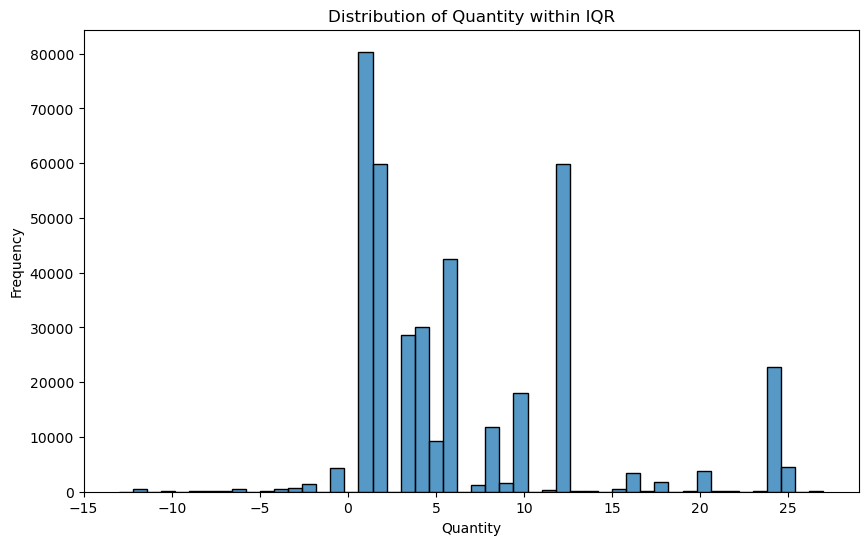

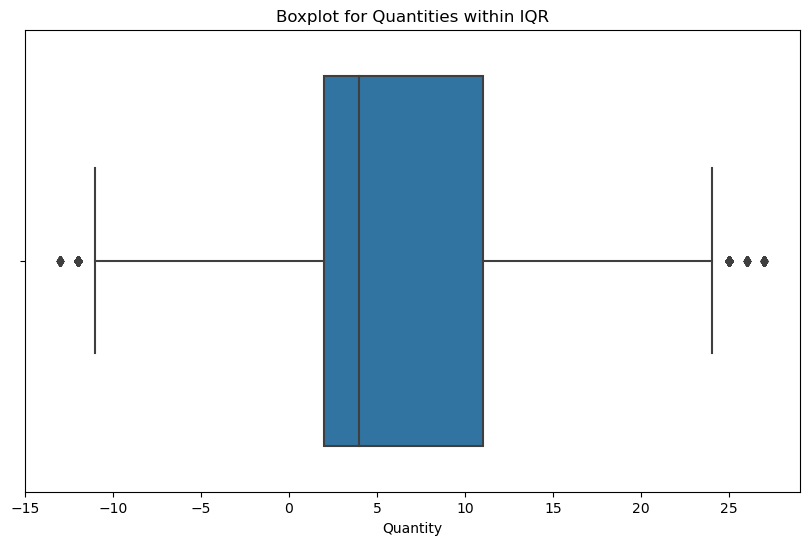

count    390149.000000
mean          6.523538
std           6.616450
min         -13.000000
25%           2.000000
50%           4.000000
75%          11.000000
max          27.000000
Name: Quantity, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out extreme outliers for visualization purposes
# We could use the interquartile range (IQR) to filter out extreme outliers.
Q1 = data_cleaned['Quantity'].quantile(0.25)
Q3 = data_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for what we'll consider as acceptable values (this is arbitrary and can be adjusted)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data within the interquartile range for visualization
filtered_quantities = data_cleaned[(data_cleaned['Quantity'] >= lower_bound) & (data_cleaned['Quantity'] <= upper_bound)]['Quantity']

# Now let's plot the histogram for this filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_quantities, bins=50, kde=False)
plt.title('Distribution of Quantity within IQR')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

#Let's do boxplot to undertand the data more
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_quantities)
plt.title('Boxplot for Quantities within IQR')
plt.xlabel('Quantity')
plt.show()

# Summary Statistics for the filtered Quantity data
filtered_quantity_description = filtered_quantities.describe()
print(filtered_quantity_description)


#### Analyzing 'Price'

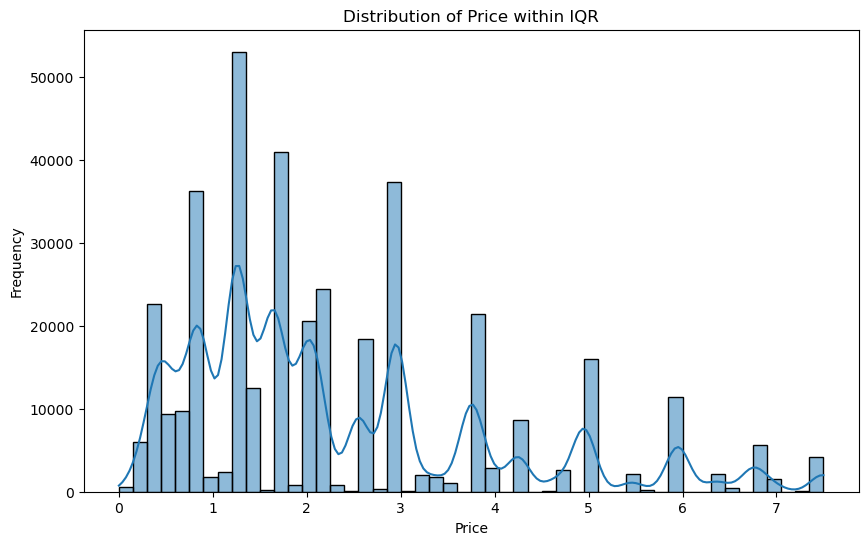

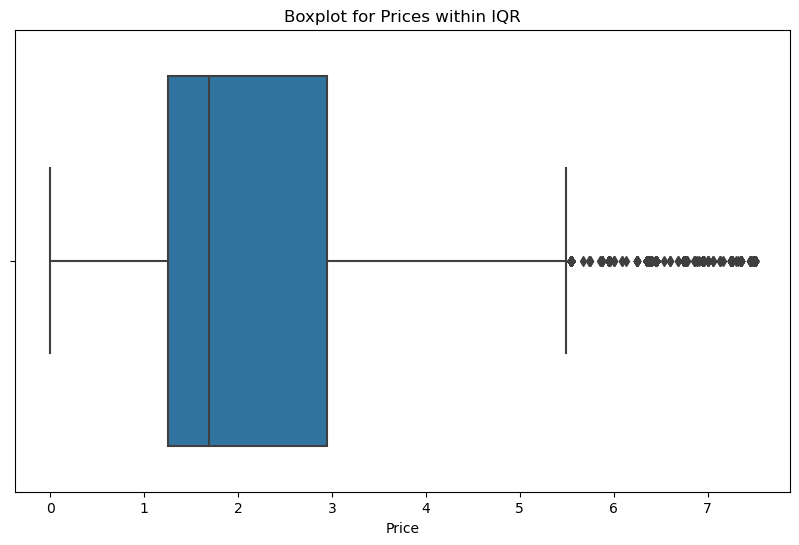

count    382461.000000
mean          2.294439
std           1.656923
min           0.000000
25%           1.250000
50%           1.690000
75%           2.950000
max           7.500000
Name: Price, dtype: float64


In [13]:
# Filter out extreme price outliers for visualization purposes using the interquartile range (IQR)
Q1_price = data_cleaned['Price'].quantile(0.25)
Q3_price = data_cleaned['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
filtered_prices = data_cleaned[(data_cleaned['Price'] >= lower_bound_price) & (data_cleaned['Price'] <= upper_bound_price)]['Price']

# Histogram for the filtered Price data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=50, kde=True)
plt.title('Distribution of Price within IQR')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the filtered Price data
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_prices)
plt.title('Boxplot for Prices within IQR')
plt.show()

# Summary Statistics for the filtered Price data
filtered_price_description = filtered_prices.describe()
print(filtered_price_description)


### 2. Univariate Analysis of Categorical Features
#### Analyzing 'StockCode'

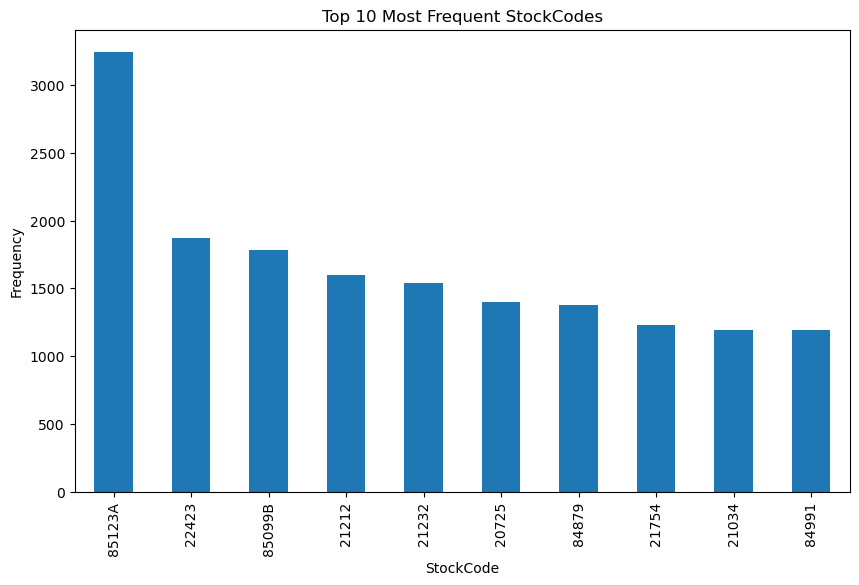

In [14]:
# Top 10 Most Frequent StockCodes
plt.figure(figsize=(10, 6))
data_cleaned['StockCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.show()


The bar chart shows that StockCode '85123A' is the top-selling item, with a notable drop in frequency for other items. This suggests a few key products drive most sales. Analyzing these top sellers can guide inventory management, marketing strategies, and sales forecasts, enhancing business decisions and promotional planning.

#### Analyzing 'Description'

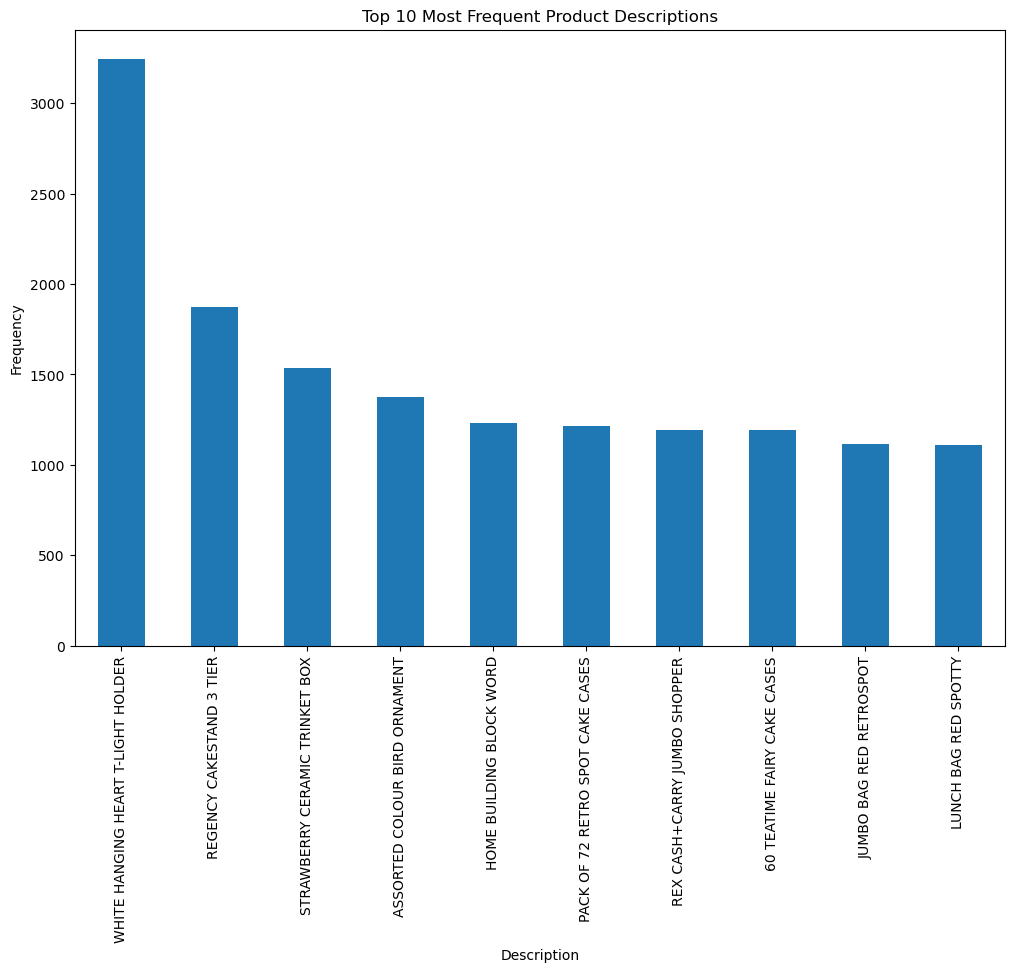

In [15]:
# Top 10 Most Frequent Descriptions
plt.figure(figsize=(12, 8))
data_cleaned['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Product Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.show()


The bar chart shows 'WHITE HANGING HEART T-LIGHT HOLDER' as the top seller, with others trailing. This insight aids inventory management, marketing strategies, and highlights diverse customer preferences for product planning.

#### Analyzing 'Country'

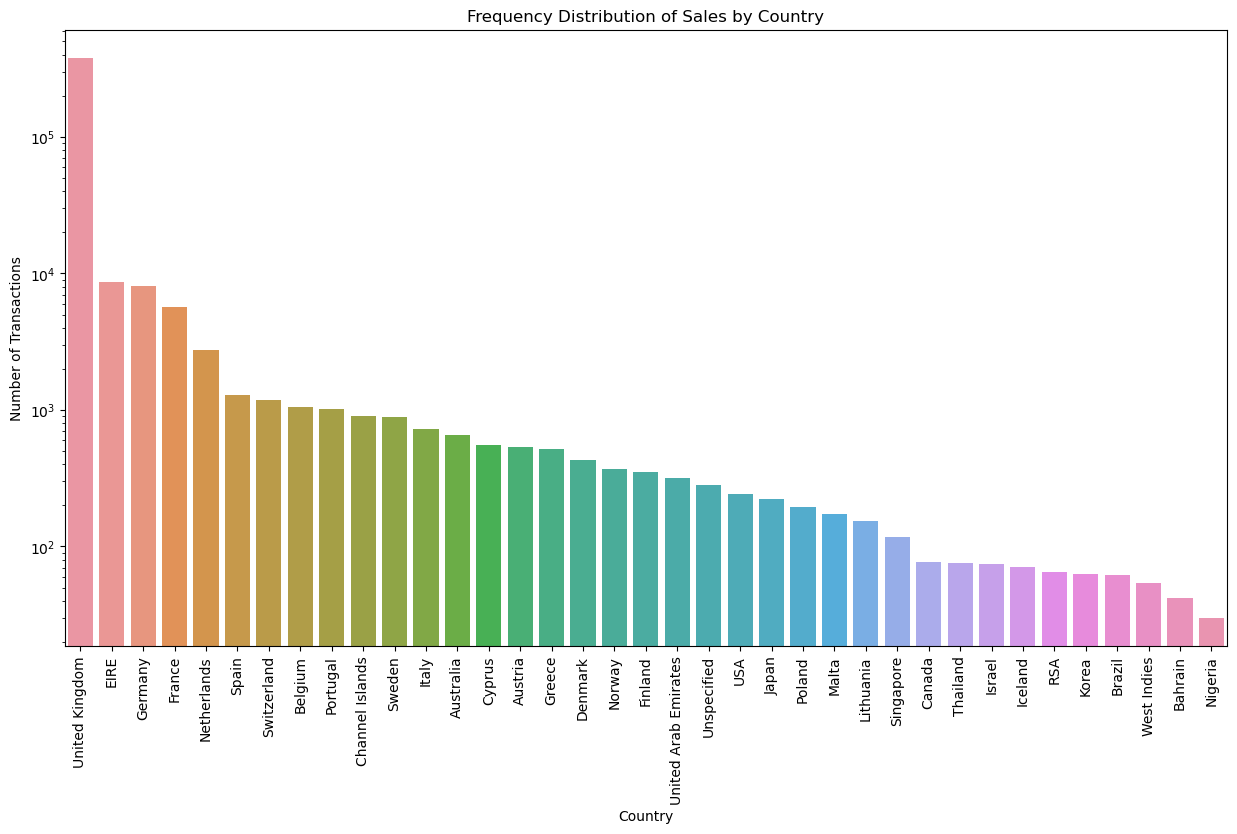

In [16]:
plt.figure(figsize=(15, 8))  # Increase figure size
country_counts = data_cleaned['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values)  # Create bar plot|
plt.title('Frequency Distribution of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlap
plt.show()


### 3. Bivariate/Multivariate Analysis
#### Correlation Analysis

In [17]:
data_cleaned.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [20]:
corl={'Quantity','Price','Customer ID'}

In [21]:
new=data_cleaned[["Quantity","Price","Customer ID"]]

In [22]:
# Calculate the correlation matrix for the numerical features
correlation_matrix = new.corr()



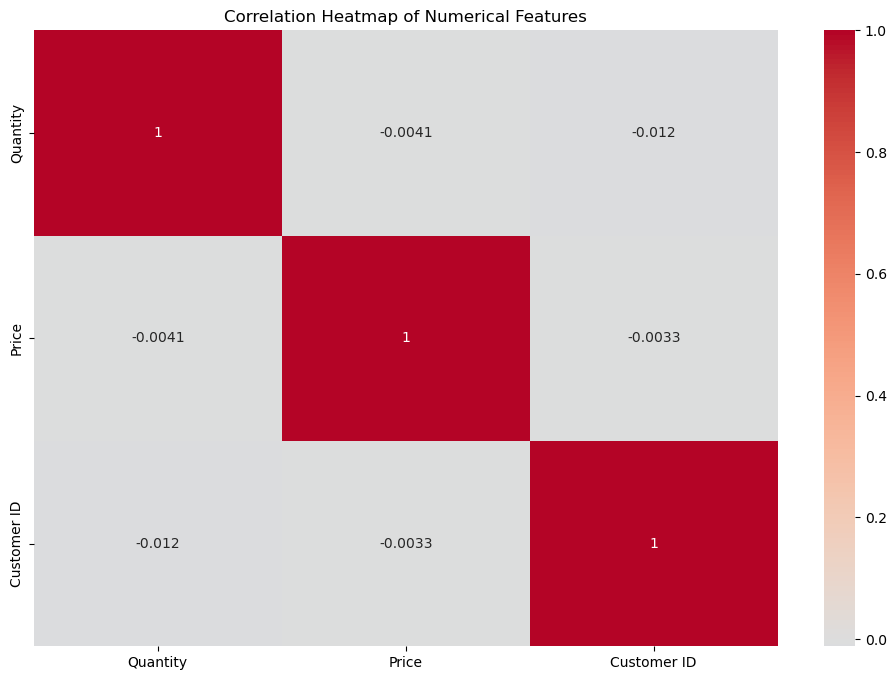

In [23]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


#### Comparative Analysis
##### Top-Selling Products

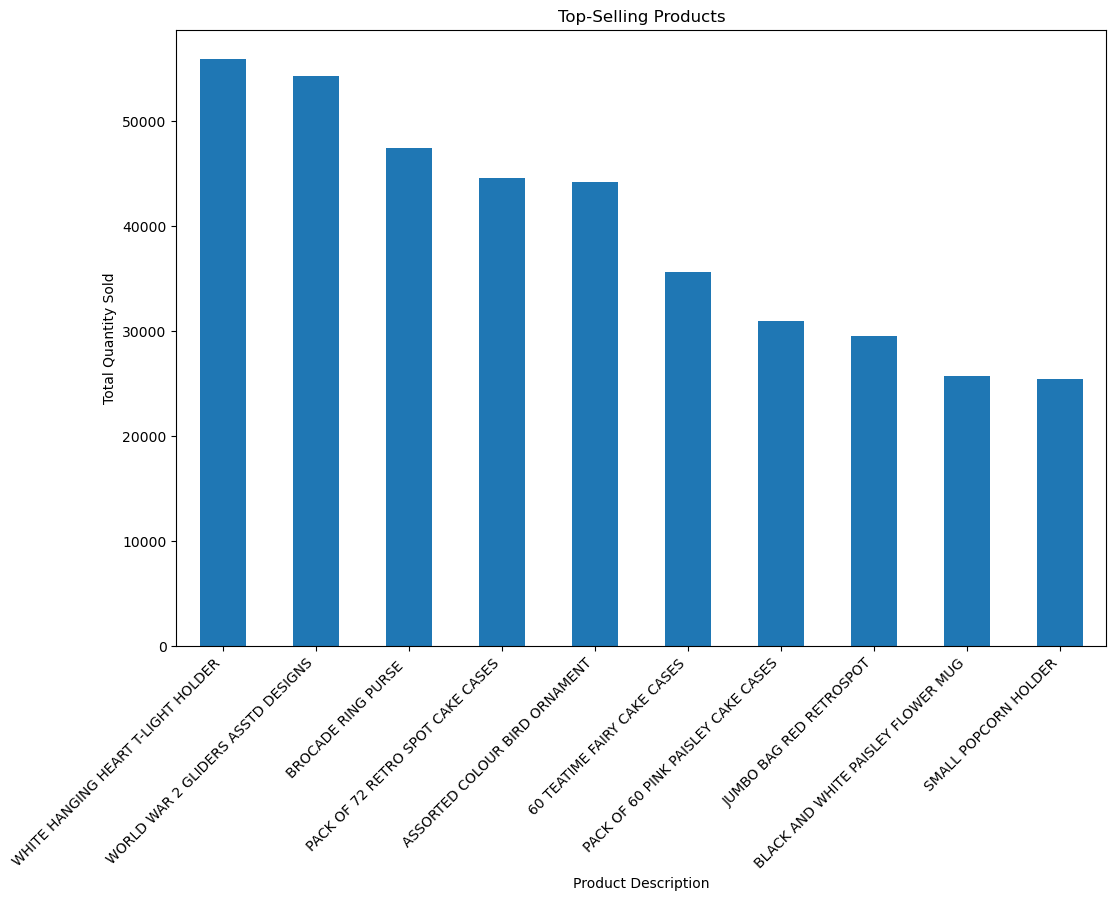

In [24]:
# Group by 'Description' and sum 'Quantity' to find top-selling products
top_selling_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar plot of top-selling products
plt.figure(figsize=(12, 8))
top_selling_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


##### Most Active Customer Segments

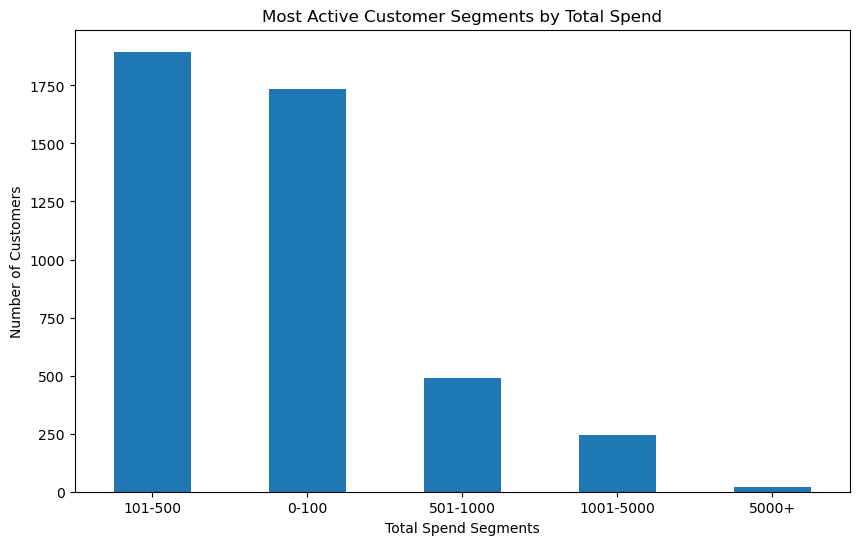

In [25]:
# Group by 'Customer ID' and sum 'Price' to find total spend per customer
customer_total_spend = data_cleaned.groupby('Customer ID')['Price'].sum().sort_values(ascending=False)

# Create customer segments based on total spend
bins = [0, 100, 500, 1000, 5000, customer_total_spend.max()]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
customer_segments = pd.cut(customer_total_spend, bins=bins, labels=labels)

# Bar plot of customer segments
plt.figure(figsize=(10, 6))
customer_segments.value_counts().plot(kind='bar')
plt.title('Most Active Customer Segments by Total Spend')
plt.xlabel('Total Spend Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


### 4. Advanced Visual Analytics
#### Violin Plot for Quantity by Country:

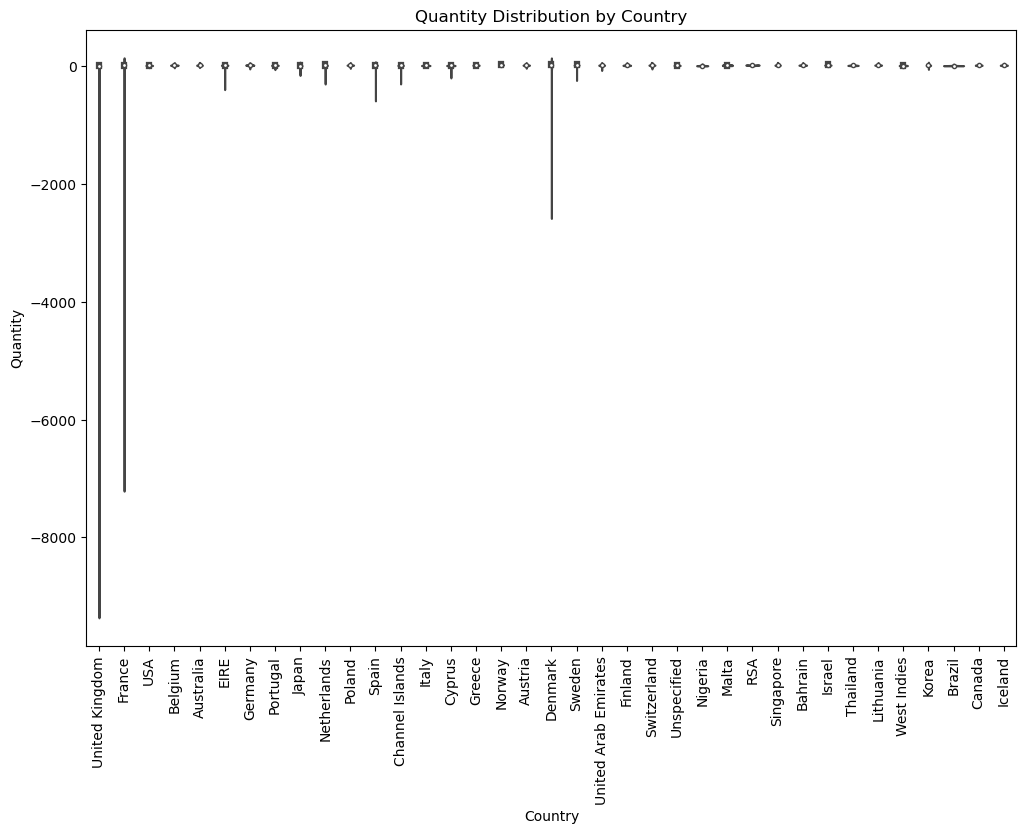

In [26]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Quantity', data=data_cleaned[data_cleaned['Quantity'] < 50])  # Limiting to reasonable quantities
plt.title('Quantity Distribution by Country')
plt.xticks(rotation=90)
plt.show()

#### Bubble Chart with Size Corresponding to a Third Variable (e.g., Profit)

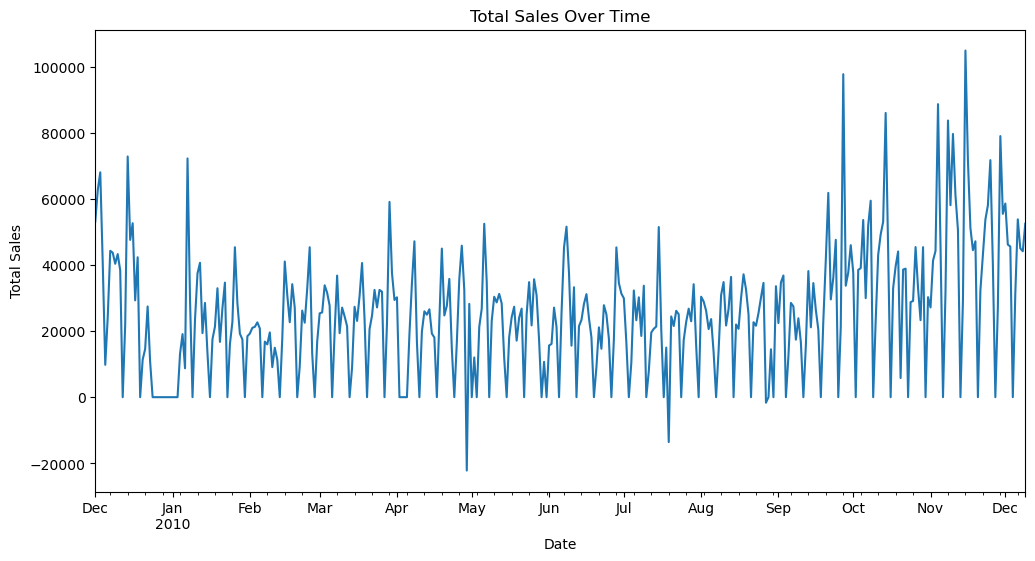

In [27]:
# Calculate TotalSales as Quantity * Price
data['TotalSales'] = data['Quantity'] * data['Price']

# First, ensure that 'InvoiceDate' is a datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Now, set 'InvoiceDate' as the index
data.set_index('InvoiceDate', inplace=True)

# Sum up total sales by date
total_sales_by_date = data['TotalSales'].resample('D').sum()

# Now plot
plt.figure(figsize=(12, 6))
total_sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


#### Faceted Grid Plot for Quantity and Price:

/Users/shalini/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


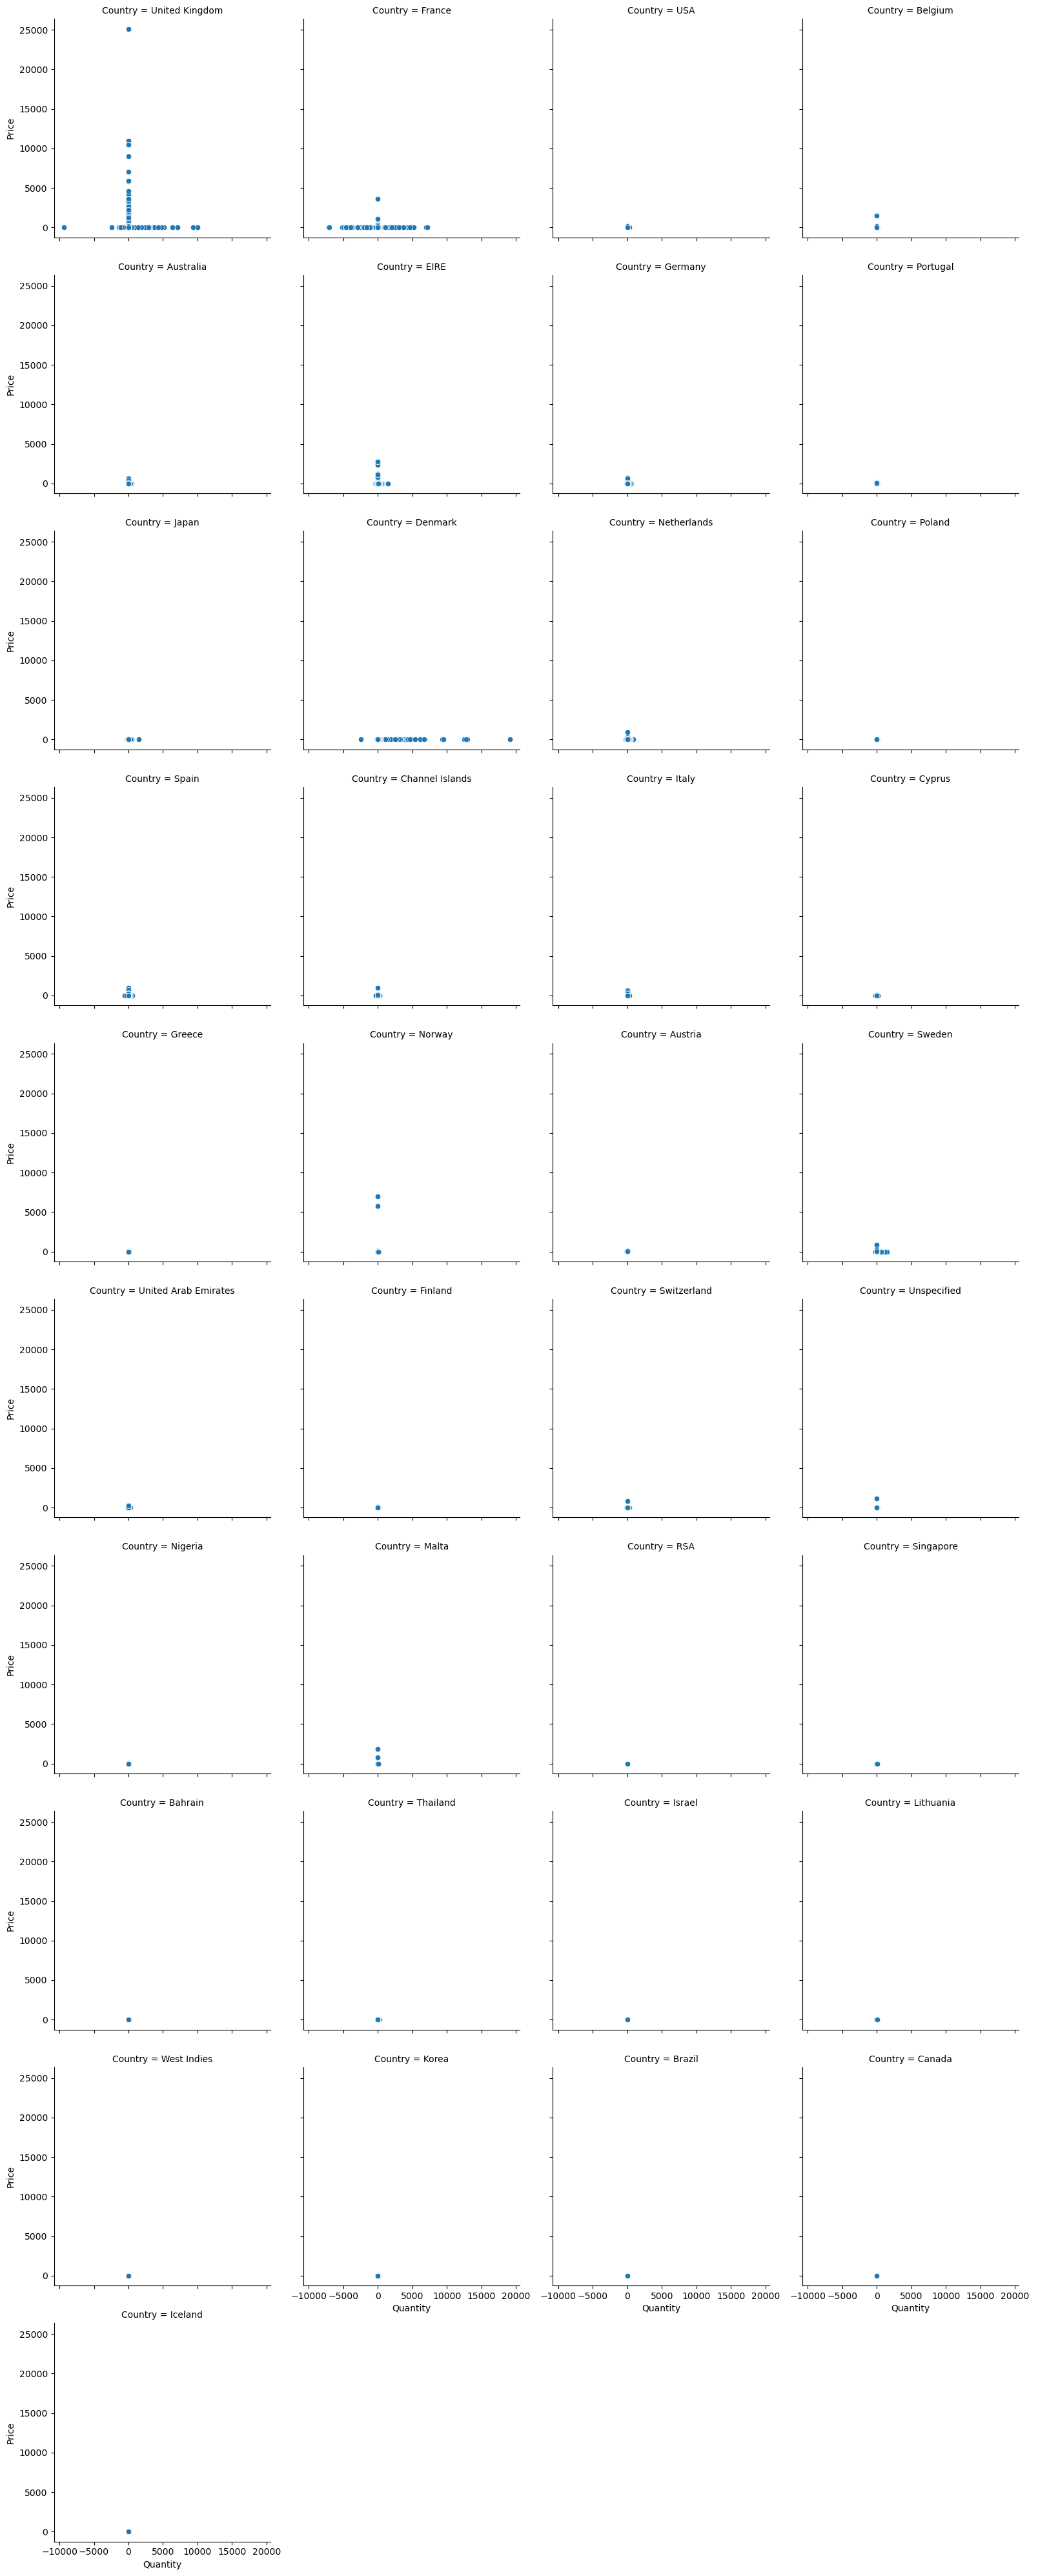

In [28]:
#Faceted Grid Plot for Quantity and Price
grid = sns.FacetGrid(data_cleaned, col='Country', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'Quantity', 'Price')
grid.add_legend()
plt.show()


#### Radar Chart for Product Categories:

In [30]:
data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['Price']
# Group by 'Description' and sum up the 'TotalSales'
category_sales = data_cleaned.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
# Select top 5 categories for the radar chart
top_n_categories = category_sales.head(5) 
print(top_n_categories)


Description
WHITE HANGING HEART T-LIGHT HOLDER    148876.66
REGENCY CAKESTAND 3 TIER              136866.30
ASSORTED COLOUR BIRD ORNAMENT          69854.96
JUMBO BAG RED RETROSPOT                51608.40
POSTAGE                                45520.86
Name: TotalSales, dtype: float64


/var/folders/gw/ljbl64c91dz2wtxk0q8rmt6c0000gn/T/ipykernel_88696/2152840955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSales'] = data_cleaned['Quantity'] * data_cleaned['Price']


In [31]:
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

#### Bubble Chart

#### 3D Scatter Plot

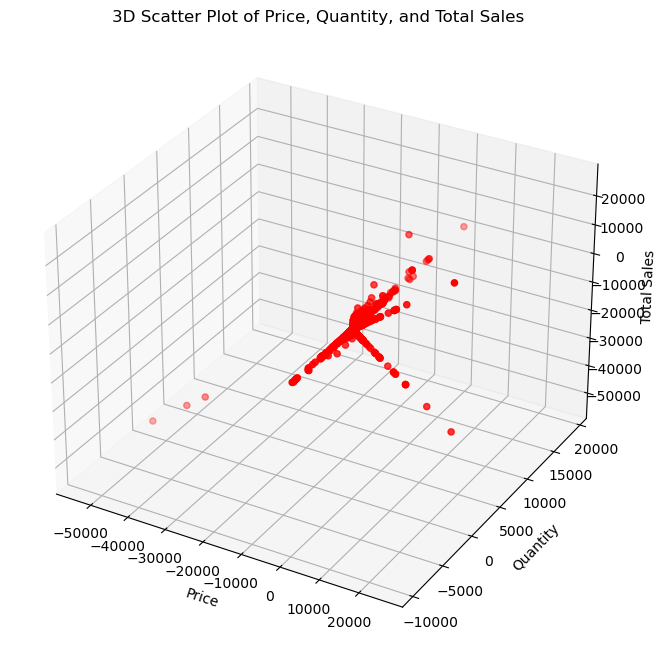

In [32]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Price'], data['Quantity'], data['TotalSales'], c='r', marker='o')
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Total Sales')
plt.title('3D Scatter Plot of Price, Quantity, and Total Sales')
plt.show()

## Modeling 
### 1. Linear Regression (Baseline Model)


In [34]:
# Summing up the purchase amounts for each customer
data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']
clv = data_cleaned.groupby('Customer ID')['TotalSpend'].sum()


/var/folders/gw/ljbl64c91dz2wtxk0q8rmt6c0000gn/T/ipykernel_88696/2126211951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalSpend'] = data_cleaned['Quantity'] * data_cleaned['Price']


In [35]:
# Aggregate features at the customer level
X_aggregated = data_cleaned.groupby('Customer ID').agg({'Quantity': 'sum', 
                                                        'Price': 'mean'})  # Adjust aggregation methods as needed

# Ensure y is also at the customer level
y_aggregated = data_cleaned.groupby('Customer ID')['TotalSpend'].sum()


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_percentage_error
# Initialize and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


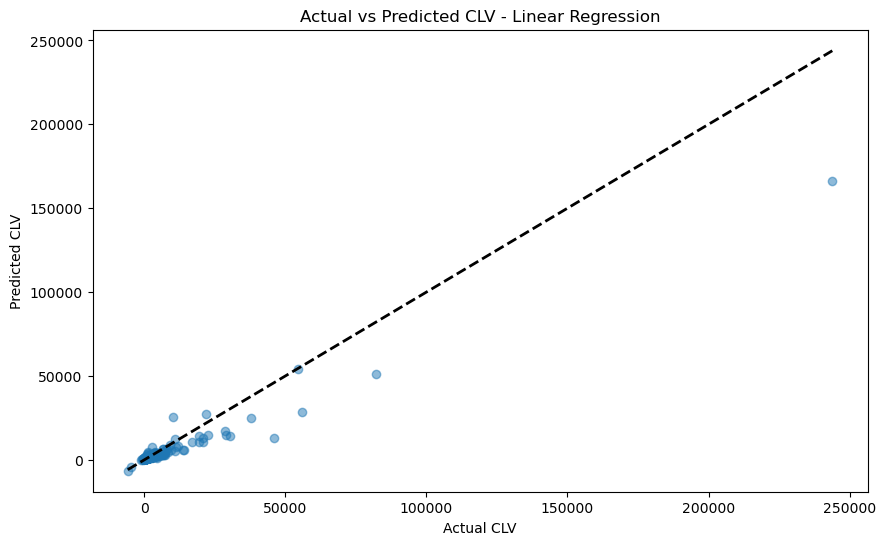

Logistic Regression RMSE: 4588.592273122713
Logistic Regression R-squared: 0.8655677584930377
Logistic Regression Tree MAPE: 0.2999057023370196


In [52]:
# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted CLV - Linear Regression')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

# Print the evaluation metrics
print(f'Logistic Regression RMSE: {rmse}')
print(f'Logistic Regression R-squared: {r_squared}')
print(f'Logistic Regression Tree MAPE: {mape}')



In [40]:
X_test

,Quantity,Price
Customer ID,,
13303.0,26,4.385000
15673.0,1846,2.686767
13202.0,571,5.027857
15958.0,131,3.159552
14291.0,3392,2.229228
...,...,...
12751.0,189,1.834032
17722.0,1342,2.625096
13829.0,12,8.500000


#### Intepratation

In [41]:
y_diff=y_test- y_pred

In [42]:
y_diff.mean()

121.65621158852537

### 2. Decision Tree Regressor
Rationale: Decision trees handle non-linear relationships and are interpretable, which can provide insights into the decision-making process.


/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


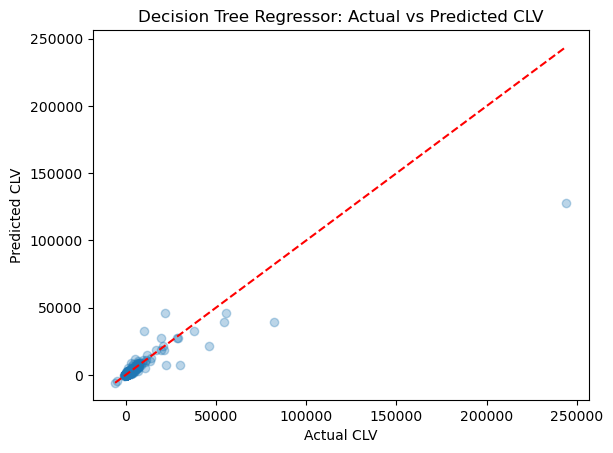

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree RMSE: 4588.592273122713
Decision Tree R-squared: 0.7739319758296269
Decision Tree MAPE: 0.2999057023370196


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV

# X_aggregated and y_aggregated are already defined in the above model

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define a grid of parameters to search over
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_

# Predict on the test data
y_pred = best_tree.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)


# Visualization
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.title('Decision Tree Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Output the performance metrics
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Decision Tree RMSE: {rmse}')
print(f'Decision Tree R-squared: {r2}')
print(f'Decision Tree MAPE: {mape}')


### 3. Random Forest Regressor
Rationale: As an ensemble of decision trees, random forests are less prone to overfitting and can capture complex interactions between features.

/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


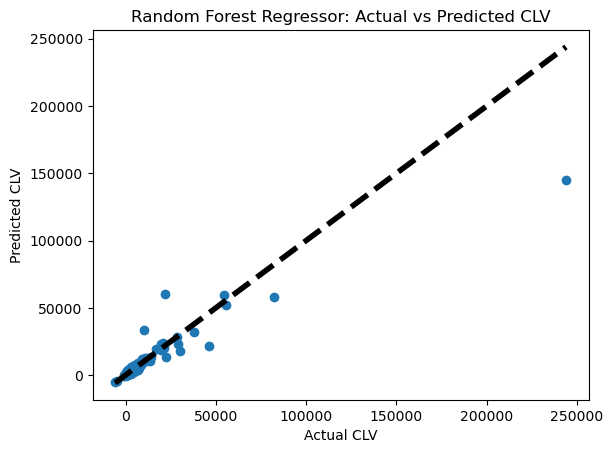

Random Forest RMSE: 3923.307289959818
Random Forest R-squared: 0.8347334922328967
Random Forest MAPE: 0.2999057023370196


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# X_aggregated and y_aggregated are already defined

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate RMSE and R-squared
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf=mean_absolute_percentage_error(y_test,y_pred)

# Visualize the predictions
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Random Forest Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R-squared: {r2_rf}')
print(f'Random Forest MAPE: {mape_rf}')


### 4. Gradient Boosting Regressor
Rationale: Gradient boosting is a powerful ensemble method that combines weak predictive models to create a strong predictive model, often leading to high performance.


/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


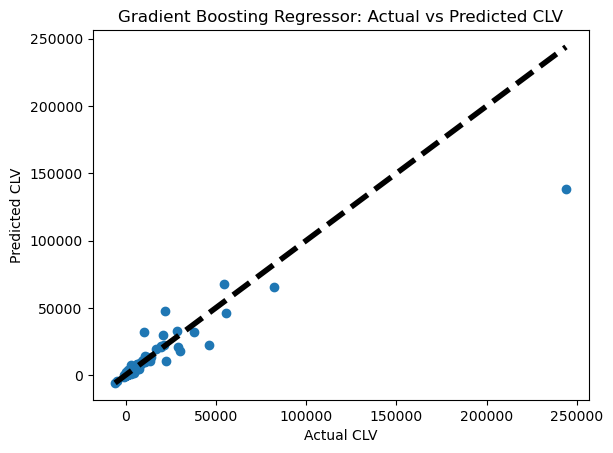

Gradient Boosting RMSE: 4014.2722362907475
Gradient Boosting R-squared: 0.8269809818457665
Gradient Boosting MAPE: 0.2999057023370196


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt

# X_aggregated and y_aggregated have already been prepared

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test data
y_pred_gbr = gbr.predict(X_test)

# Calculate RMSE and R-squared
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)
mape_gbr=mean_absolute_percentage_error(y_test,y_pred)

# Visualize the predictions
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Gradient Boosting Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Gradient Boosting RMSE: {rmse_gbr}')
print(f'Gradient Boosting R-squared: {r2_gbr}')
print(f'Gradient Boosting MAPE: {mape_gbr}')


### 5. Neural Network (Multilayer Perceptron)
Rationale: Neural networks can model complex, non-linear patterns that other algorithms may miss. They are especially useful if the relationships in the data are not well captured by traditional algorithms.


/Users/shalini/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


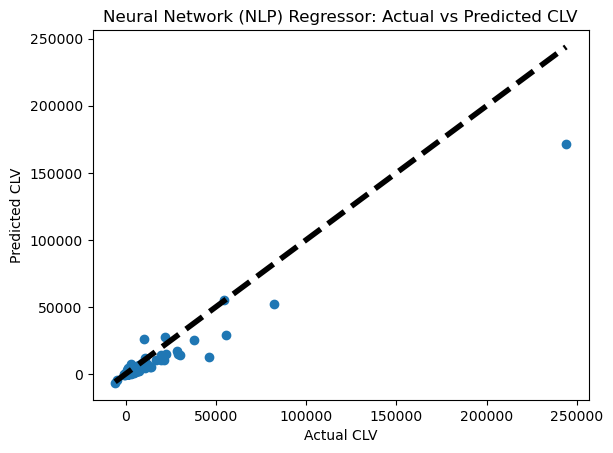

Neural Network RMSE: 3426.862578184342
Neural Network R-squared: 0.8739120517892898
Neural Network MAPE: 560159251249405.06


In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# X_aggregated and y_aggregated have already been prepared in the above models

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_aggregated, y_aggregated, test_size=0.2, random_state=42)

# Initialize the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp.predict(X_test)

# Calculate RMSE and R-squared
rmse_nlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_nlp = r2_score(y_test, y_pred_mlp)
mape_nlp = mean_absolute_percentage_error(y_test, y_pred_mlp)


# Visualize the predictions
plt.scatter(y_test, y_pred_mlp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Neural Network (NLP) Regressor: Actual vs Predicted CLV')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.show()

# Print performance metrics
print(f'Neural Network RMSE: {rmse_nlp}')
print(f'Neural Network R-squared: {r2_nlp}')
print(f'Neural Network MAPE: {mape_nlp}')


In [ ]:
df_last= df_model[(df_model.DATE_ >=  datetime.strptime("2017-2-1", '%Y-%m-%d')) & (df_model.DATE_ <= df_model['DATE_'].max())].reset_index(drop=True)

In [71]:
import datetime as dt

In [72]:
today_date = dt.datetime(2010, 12, 11)

In [69]:
df['InvoiceDate'].max()

Timestamp('2010-12-09 20:01:00')

In [78]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                         lambda date: (today_date - date.min()).days],
                                         'Invoice': lambda num: num.nunique(),
                                         'TotalSales': lambda TotalSales: TotalSales.sum()})


cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,294,361,15,-64.68
12347.0,37,40,2,1323.32
12348.0,0,74,1,222.16
12349.0,327,371,4,2646.99
12351.0,0,11,1,300.93


In [85]:
cltv = cltv_df

In [88]:
cltv

,index,Customer ID,recency,T,frequency,monetary
0,0,12346.0,294,361,15,-64.68
1,1,12347.0,37,40,2,1323.32
2,2,12348.0,0,74,1,222.16
3,3,12349.0,327,371,4,2646.99
4,4,12351.0,0,11,1,300.93
...,...,...,...,...,...,...
4378,4378,18283.0,275,294,6,641.77
4379,4379,18284.0,2,67,2,436.68
4380,4380,18285.0,0,296,1,427.00
4381,4381,18286.0,247,359,3,1188.43


In [91]:
cltv

,index,Customer ID,recency,T,frequency,monetary
0,0,12346.0,294,361,15,-64.68
1,1,12347.0,37,40,2,1323.32
2,2,12348.0,0,74,1,222.16
3,3,12349.0,327,371,4,2646.99
4,4,12351.0,0,11,1,300.93
...,...,...,...,...,...,...
4378,4378,18283.0,275,294,6,641.77
4379,4379,18284.0,2,67,2,436.68
4380,4380,18285.0,0,296,1,427.00
4381,4381,18286.0,247,359,3,1188.43


In [102]:
cltv = cltv.reset_index()
# Merging the main table and the forecast values table
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
# sorting
#cltv_final.sort_values(by="recency", ascending=False).head(10)

In [73]:
df=data_cleaned

In [83]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalSales            float64
TotalSpend            float64
dtype: object

In [84]:
cltv_df.dtypes

recency        int64
T              int64
frequency      int64
monetary     float64
dtype: object

In [103]:
from sklearn.cluster import KMeans

In [90]:
cltv_df

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,294,361,15,-64.68
12347.0,37,40,2,1323.32
12348.0,0,74,1,222.16
12349.0,327,371,4,2646.99
12351.0,0,11,1,300.93
...,...,...,...,...
18283.0,275,294,6,641.77
18284.0,2,67,2,436.68
18285.0,0,296,1,427.00


In [104]:
RFM_df= pd.merge(df, cltv[['Customer ID','recency','frequency','monetary','T']], on='Customer ID')
RFM_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1


In [105]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['recency']])
RFM_df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1


In [106]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['frequency']])
RFM_df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster,FrequencyCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1,0
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1,0
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1,0
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1,0


In [107]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['monetary']])
RFM_df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster,FrequencyCluster,MonetaryCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1,0,0
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1,0,0
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1,0,0
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1,0,0


In [ ]:
monetary_df= df_first.groupby('CLIENTCODE')['LINENETTOTAL'].sum().reset_index()
monetary_df.columns = ['CLIENTCODE', 'monetary']
monetary_df.head()

In [108]:
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster,FrequencyCluster,MonetaryCluster,OverallScore,Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0,0,0,0,Low-Value
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,0,Low-Value
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,0,Low-Value
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0,0,0,0,Low-Value
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0,0,0,0,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1,0,0,1,Low-Value
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1,0,0,1,Low-Value
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1,0,0,1,Low-Value
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1,0,0,1,Low-Value


In [ ]:
Timestamp('2010-12-09 20:01:00')

In [124]:
import datetime as dt
from datetime import datetime, timedelta, date

In [121]:
df_cl=RFM_df

In [128]:
df_last= df_cl[(df_cl.InvoiceDate >=  datetime.strptime("2010-10-8", '%Y-%m-%d')) & (df_cl.InvoiceDate <= df_cl['InvoiceDate'].max())].reset_index(drop=True)

In [129]:
df_last

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster,FrequencyCluster,MonetaryCluster,OverallScore,Segment
0,C527339,M,Manual,-1,2010-10-15 15:35:00,830.12,13085.0,United Kingdom,-830.12,-830.12,318,7,1187.08,374,0,0,0,0,Low-Value
1,526664,85124C,GREEN JUICY FRUIT PHOTO FRAME,6,2010-10-12 15:20:00,2.55,13078.0,United Kingdom,15.30,15.30,372,53,16451.55,374,0,3,0,3,Mid-Value
2,526664,22191,IVORY DINER WALL CLOCK,2,2010-10-12 15:20:00,8.50,13078.0,United Kingdom,17.00,17.00,372,53,16451.55,374,0,3,0,3,Mid-Value
3,526664,22193,RED DINER WALL CLOCK,2,2010-10-12 15:20:00,8.50,13078.0,United Kingdom,17.00,17.00,372,53,16451.55,374,0,3,0,3,Mid-Value
4,526664,35004B,SET OF 3 BLACK FLYING DUCKS,12,2010-10-12 15:20:00,1.95,13078.0,United Kingdom,23.40,23.40,372,53,16451.55,374,0,3,0,3,Mid-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114893,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1,0,0,1,Low-Value
114894,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1,0,0,1,Low-Value
114895,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1,0,0,1,Low-Value
114896,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1,0,0,1,Low-Value


In [130]:
monetary_df_last= df_last.groupby('Customer ID')['TotalSales'].sum().reset_index()
monetary_df_last.columns = ['Customer ID', 'lastMonthsMonetary']
monetary_df_last['Customer ID']= monetary_df_last['Customer ID'].astype("object")
monetary_df_last.head()

,Customer ID,lastMonthsMonetary
0,12347.0,1323.32
1,12349.0,1402.62
2,12351.0,300.93
3,12352.0,343.80
4,12353.0,317.76


In [112]:
RFM_df.groupby('OverallScore')['recency'].mean()

OverallScore
0    345.793022
1     61.067713
2    159.501206
3    292.222478
4    367.112147
5    144.264167
6    327.337523
9    269.634956
Name: recency, dtype: float64

In [113]:
RFM_df_l = RFM_df

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [115]:
RFM_df_l.dtypes

Invoice                     object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
Price                      float64
Customer ID                float64
Country                     object
TotalSales                 float64
TotalSpend                 float64
recency                      int64
frequency                    int64
monetary                   float64
T                            int64
RecencyCluster               int32
FrequencyCluster             int32
MonetaryCluster              int32
OverallScore                 int32
Segment                     object
dtype: object

In [116]:
df_m=RFM_df_l

In [118]:
Num= df_m.select_dtypes(exclude='object').columns.tolist()
Num

['Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'TotalSales',
 'TotalSpend',
 'recency',
 'frequency',
 'monetary',
 'T',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'OverallScore']

In [120]:
co={'Quantity',
 'Price',
 'Customer ID',
 'TotalSales',
 'TotalSpend',
 'recency',
 'frequency',
 'monetary',
 'T',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'OverallScore',
'Segment'}

In [131]:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='Customer ID', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['Customer ID']= RFM_df_NEW['Customer ID'].astype("object")
RFM_df_NEW

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,RecencyCluster,FrequencyCluster,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0,0,0,0,Low-Value,-830.12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,0,Low-Value,-830.12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,0,Low-Value,-830.12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0,0,0,0,Low-Value,-830.12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0,0,0,0,Low-Value,-830.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538145,35648,VINTAGE BEAD PINK PURSE,12,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,35.40,35.40,0,1,383.07,1,1,0,0,1,Low-Value,383.07
417530,538145,22276,WASH BAG VINTAGE ROSE PAISLEY,6,2010-12-09 16:08:00,2.55,15211.0,United Kingdom,15.30,15.30,0,1,383.07,1,1,0,0,1,Low-Value,383.07
417531,538145,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 16:08:00,2.95,15211.0,United Kingdom,17.70,17.70,0,1,383.07,1,1,0,0,1,Low-Value,383.07
417532,538145,22469,HEART OF WICKER SMALL,12,2010-12-09 16:08:00,1.65,15211.0,United Kingdom,19.80,19.80,0,1,383.07,1,1,0,0,1,Low-Value,383.07


In [132]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
RFM_df_NEW['LTVCluster'].unique()


array([0, 1, 2], dtype=int32)

In [136]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [137]:
RFM_df= order_cluster('RecencyCluster', 'recency', RFM_df, False)
RFM_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,recency,frequency,monetary,T,FrequencyCluster,MonetaryCluster,OverallScore,Segment,RecencyCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,318,7,1187.08,374,0,0,0,Low-Value,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,Low-Value,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,318,7,1187.08,374,0,0,0,Low-Value,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,318,7,1187.08,374,0,0,0,Low-Value,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,318,7,1187.08,374,0,0,0,Low-Value,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,535372,22746,POPPY'S PLAYHOUSE LIVINGROOM,6,2010-11-25 18:16:00,2.10,16042.0,United Kingdom,12.60,12.60,88,6,1005.63,89,0,0,2,Low-Value,2
417530,C536734,22780,LIGHT GARLAND BUTTERFILES PINK,-4,2010-12-02 12:50:00,4.25,16042.0,United Kingdom,-17.00,-17.00,88,6,1005.63,89,0,0,2,Low-Value,2
417531,C536734,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2010-12-02 12:50:00,7.95,16042.0,United Kingdom,-7.95,-7.95,88,6,1005.63,89,0,0,2,Low-Value,2
417532,C538109,22780,LIGHT GARLAND BUTTERFILES PINK,-4,2010-12-09 15:23:00,4.25,16042.0,United Kingdom,-17.00,-17.00,88,6,1005.63,89,0,0,2,Low-Value,2


In [ ]:
for i in ["InvoiceDate","RecencyCluster","StockCode", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

In [139]:
RFM_df_NEW = order_cluster('RecencyCluster', 'recency', RFM_df_NEW, True)
RFM_df_NEW

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,...,frequency,monetary,T,FrequencyCluster,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster,RecencyCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,...,7,1187.08,374,0,0,0,Low-Value,-830.12,0,3
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,...,7,1187.08,374,0,0,0,Low-Value,-830.12,0,3
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,...,7,1187.08,374,0,0,0,Low-Value,-830.12,0,3
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,...,7,1187.08,374,0,0,0,Low-Value,-830.12,0,3
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,...,7,1187.08,374,0,0,0,Low-Value,-830.12,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,537868,22547,MINI JIGSAW DINOSAUR,24,2010-12-08 16:49:00,0.42,12433.0,Norway,10.08,10.08,...,6,7052.99,112,0,0,2,Low-Value,6079.30,1,1
417530,537868,22544,MINI JIGSAW SPACEBOY,24,2010-12-08 16:49:00,0.42,12433.0,Norway,10.08,10.08,...,6,7052.99,112,0,0,2,Low-Value,6079.30,1,1
417531,537868,22543,MINI JIGSAW BAKE A CAKE,24,2010-12-08 16:49:00,0.42,12433.0,Norway,10.08,10.08,...,6,7052.99,112,0,0,2,Low-Value,6079.30,1,1
417532,537868,22540,MINI JIGSAW CIRCUS PARADE,24,2010-12-08 16:49:00,0.42,12433.0,Norway,10.08,10.08,...,6,7052.99,112,0,0,2,Low-Value,6079.30,1,1


In [141]:
RFM_df_NEW = order_cluster('FrequencyCluster', 'frequency', RFM_df_NEW, True)
RFM_df_NEW

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,TotalSpend,...,frequency,monetary,T,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster,RecencyCluster,FrequencyCluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,83.40,...,7,1187.08,374,0,0,Low-Value,-830.12,0,3,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,...,7,1187.08,374,0,0,Low-Value,-830.12,0,3,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,81.00,...,7,1187.08,374,0,0,Low-Value,-830.12,0,3,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,100.80,...,7,1187.08,374,0,0,Low-Value,-830.12,0,3,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,30.00,...,7,1187.08,374,0,0,Low-Value,-830.12,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417529,538009,21754,HOME BUILDING BLOCK WORD,3,2010-12-09 12:17:00,5.95,14911.0,EIRE,17.85,17.85,...,270,137675.91,374,1,3,Mid-Value,36989.79,2,3,3
417530,538009,22840,ROUND CAKE TIN VINTAGE RED,2,2010-12-09 12:17:00,7.95,14911.0,EIRE,15.90,15.90,...,270,137675.91,374,1,3,Mid-Value,36989.79,2,3,3
417531,538009,22842,BISCUIT TIN VINTAGE RED,2,2010-12-09 12:17:00,6.75,14911.0,EIRE,13.50,13.50,...,270,137675.91,374,1,3,Mid-Value,36989.79,2,3,3
417532,538009,22197,SMALL POPCORN HOLDER,36,2010-12-09 12:17:00,0.85,14911.0,EIRE,30.60,30.60,...,270,137675.91,374,1,3,Mid-Value,36989.79,2,3,3


In [142]:
df_1=RFM_df_NEW

In [143]:
Num= df_1.select_dtypes(exclude='object').columns.tolist()
Num

['Quantity',
 'InvoiceDate',
 'Price',
 'TotalSales',
 'TotalSpend',
 'recency',
 'frequency',
 'monetary',
 'T',
 'MonetaryCluster',
 'OverallScore',
 'lastMonthsMonetary',
 'LTVCluster',
 'RecencyCluster',
 'FrequencyCluster']

In [144]:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_1[cols] = scalerNum.fit_transform(df_1[[cols]])

In [146]:
df_1.dtypes

Invoice                object
StockCode              object
Description            object
Quantity              float64
InvoiceDate           float64
Price                 float64
Customer ID            object
Country                object
TotalSales            float64
TotalSpend            float64
recency               float64
frequency             float64
monetary              float64
T                     float64
MonetaryCluster       float64
OverallScore          float64
Segment                object
lastMonthsMonetary    float64
LTVCluster            float64
RecencyCluster        float64
FrequencyCluster      float64
dtype: object

In [147]:
Cat= df_1.select_dtypes(include='object').columns.tolist()
Cat

['Invoice', 'StockCode', 'Description', 'Customer ID', 'Country', 'Segment']

In [148]:
df_f = df_1.drop(['Country','Segment','StockCode','Description','Invoice','InvoiceDate'], axis=1)

In [149]:
from sklearn.preprocessing import LabelEncoder
df_f = df_f.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_f.head()

,Quantity,Price,Customer ID,TotalSales,TotalSpend,recency,frequency,monetary,T,MonetaryCluster,OverallScore,lastMonthsMonetary,LTVCluster,RecencyCluster,FrequencyCluster
0,-0.007497,0.043053,507,0.634594,0.634594,0.5654,-0.37436,-0.309067,0.805055,-0.271219,-1.219874,-0.49117,-0.313683,0.896878,-0.464006
1,-0.007497,0.040242,507,0.610574,0.610574,0.5654,-0.37436,-0.309067,0.805055,-0.271219,-1.219874,-0.49117,-0.313683,0.896878,-0.464006
2,-0.007497,0.040242,507,0.610574,0.610574,0.5654,-0.37436,-0.309067,0.805055,-0.271219,-1.219874,-0.49117,-0.313683,0.896878,-0.464006
3,0.348163,-0.025130,507,0.808741,0.808741,0.5654,-0.37436,-0.309067,0.805055,-0.271219,-1.219874,-0.49117,-0.313683,0.896878,-0.464006
4,0.111057,-0.037080,507,0.100144,0.100144,0.5654,-0.37436,-0.309067,0.805055,-0.271219,-1.219874,-0.49117,-0.313683,0.896878,-0.464006


In [151]:
X = df_f.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_f['LTVCluster']

In [163]:
df_f['LTVCluster']

0        -0.313683
1        -0.313683
2        -0.313683
3        -0.313683
4        -0.313683
            ...   
417529    4.895035
417530    4.895035
417531    4.895035
417532    4.895035
417533    4.895035
Name: LTVCluster, Length: 417534, dtype: float64

In [152]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [158]:
X_train

,Quantity,Price,Customer ID,TotalSales,TotalSpend,recency,frequency,monetary,T,MonetaryCluster,OverallScore,RecencyCluster,FrequencyCluster
307789,-0.106291,-0.013180,2720,-0.141060,-0.141060,-1.028270,-0.466566,-0.227262,-1.025869,-0.271219,0.119381,-0.899300,-0.464006
275482,-0.116171,-0.045515,2553,-0.193604,-0.193604,-1.157706,-0.466566,-0.337766,0.650056,-0.271219,0.119381,-0.899300,-0.464006
307228,-0.106291,0.014936,1551,-0.101026,-0.101026,-0.809849,-0.420463,-0.284538,-1.016182,-0.271219,0.119381,-0.899300,-0.464006
118457,-0.096412,-0.031456,2591,-0.150568,-0.150568,0.274171,-0.305206,-0.302207,0.727556,-0.271219,0.789009,-0.001211,-0.464006
411827,-0.066773,-0.025130,1869,-0.074003,-0.074003,1.010333,5.688174,4.056756,0.805055,1.198727,0.789009,0.896878,4.164568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,-0.116171,0.028995,3249,-0.140559,-0.140559,0.937526,0.224978,-0.087731,0.727556,-0.271219,0.789009,0.896878,1.078852
358083,-0.086532,0.099287,89,0.238260,0.238260,0.913257,0.063618,-0.003910,0.727556,-0.271219,0.789009,0.896878,1.078852
152315,-0.135929,-0.013180,671,-0.229634,-0.229634,-0.227390,-0.397411,-0.320797,0.136623,-0.271219,0.789009,-0.001211,-0.464006
117952,0.861894,-0.044531,2390,0.520498,0.520498,-0.219301,-0.120794,-0.213545,0.737243,-0.271219,0.789009,-0.001211,-0.464006


In [154]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [162]:
y_train.count()

292273

In [156]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}